## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
ab_df=pd.read_csv('ab_data.csv')
ab_df.head(20)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
ab_df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
print("Number of unique users",len(ab_df['user_id'].unique()) )

Number of unique users 290584


d. The proportion of users converted.

In [5]:
df = ab_df[ab_df['converted'] == 1]

print("The proportion of users converted: ",df['converted'].count()/ab_df.shape[0])

The proportion of users converted:  0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df = ab_df.query('group == "treatment" and landing_page == "old_page" or group == "control" and landing_page == "new_page"  ')
#df.info()

print("The number of times the `new_page` and `treatment` don't line up is: ",df.shape[0])

The number of times the `new_page` and `treatment` don't line up is:  3893


f. Do any of the rows have missing values?

In [7]:
ab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


No missing Data

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2=ab_df.query('group == "treatment" and landing_page == "new_page" or group == "control" and landing_page == "old_page"  ')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2=df2.drop(2893,axis=0)


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:

print("The probability of an individual converting regardless of the page they receive: ",df2['converted'].mean())

The probability of an individual converting regardless of the page they receive:  0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
mean_df =df2[df2['group'] == 'control']['converted'].mean()
#df.head()
print(" The probability of an individual converting and was in control group: ",mean_df)

 The probability of an individual converting and was in control group:  0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
mean_df =df2[df2['group'] == 'treatment']['converted'].mean()
#df.head()
print(" The probability of an individual converting and was in treatment group: ",mean_df)

 The probability of an individual converting and was in treatment group:  0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
df2[df2['landing_page'] == 'new_page'].shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

#### I don't think their is a sufficient evidence to say that the new treatment page leads to new evidence on contrast the probability of control is larger than treatment group but with very tiny diffrence so i guess we can't make a good desciion whether the page leads to new conversions or not as the difference is very tiny. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<div align="center"> $H_{o}$ =   $p_{new}$ - $p_{old}$ <=0  </div>

   <div align="center"> The old Page is better or the same as the new page</div>
<div align="center"> $H_{1}$ =   $p_{new}$ - $p_{old}$ > 0 </div>
   <div align="center"> The old page is not better than the new page</div>


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
#Pnew is the average of the pages 
Pnew=df2['converted'].mean()
print("convert rate for  𝑝𝑛𝑒𝑤  under the null is ",Pnew)
    

convert rate for  𝑝𝑛𝑒𝑤  under the null is  0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
# assuming P_new = P_old in null hypothesis
Pold=df2['converted'].mean()
print("convert rate for  𝑝old  under the null is ",Pold)
    

convert rate for  𝑝old  under the null is  0.11959708724499628


c. What is $n_{new}$ (It is the number of individuals in treatment group)?

In [20]:
n_new=df2[df2['group']=='treatment'].shape[0]
print(n_new)

145310


d. What is $n_{old}$ (It is the number of individuals in control group)?

In [21]:
n_old=df2[df2['group']=='control'].shape[0]
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# to simulate sth means to give it some values to see its behaviour 
new_page_converted= np.random.choice([1, 0], size=n_new, p=[Pnew, 1-Pnew])
new_page_converted

array([0, 1, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted= np.random.choice([1, 0], size=n_old, p=[Pold, 1-Pold])
old_page_converted

array([0, 0, 0, ..., 0, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_converted.mean()-old_page_converted.mean()

-0.0006907120018362495

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs=[]
for _ in range(10000):
    new_converted= np.random.choice([1, 0], size=n_new, p=[Pnew, 1-Pnew])
    old_converted= np.random.choice([1, 0], size=n_old, p=[Pold, 1-Pold])
    p_diffs.append(new_converted.mean()-old_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

It is a normal Distribution of random values with mean 0 of the diffrences between the old page and the new page


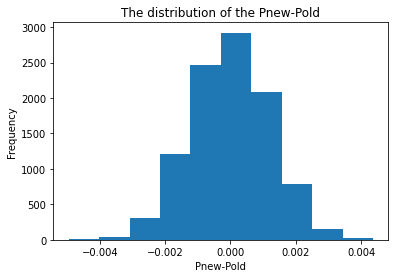

In [26]:
plt.hist(p_diffs)
plt.title("The distribution of the Pnew-Pold")
plt.xlabel("Pnew-Pold")
plt.ylabel("Frequency")
print("It is a normal Distribution of random values with mean 0 of the diffrences between the old page and the new page")

##### This plot looks like what I was expecting a normal distribution 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
prob_treat_conv=df2.query("group=='treatment'")['converted'].mean() # the acual probability of converted Treatment group
prob_control_conv=df2.query("group=='control'")['converted'].mean() # the acual probability of converted control group
act_diff=prob_treat_conv-prob_control_conv # the actual difference observed from the original dataset
por_Val=(p_diffs>act_diff).mean() # statistics if null hypothesis is true
print("proportion of the p_diffs are greater than the actual difference observed in ab_data.csv is :",por_Val)

proportion of the p_diffs are greater than the actual difference observed in ab_data.csv is : 0.9076


#### por_val is large then the null hypothesis is true and it's failed to reject the null

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### I computed the statistics by considering that the null hypothesis , I found out that the P_value is equal to 0.9051 which is higher than alpha =1-P_value=0.05 so we will not reject the null hypothesis

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = len(df2[df2['group']=='control'][df2.converted == 1])
convert_new = len(df2[df2['group']=='treatment'][df2.converted == 1])
n_old = len(df2[df2['group']=='control'])
n_new =len(df2[df2['group']=='treatment'])


<ipython-input-28-82ff47351594>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  convert_old = len(df2[df2['group']=='control'][df2.converted == 1])
<ipython-input-28-82ff47351594>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  convert_new = len(df2[df2['group']=='treatment'][df2.converted == 1])


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([n_old,n_new])
nobs = np.array([convert_old, convert_new])
stat, pval = proportions_ztest(nobs, count,alternative='smaller')
print("(z_score: ",str(stat)+" , P_value:  "+str(pval)+")")

(z_score:  1.3109241984234394 , P_value:  0.9050583127590245)


P-value :the probability that a particular statistical measure, such as the mean or standard deviation, of an assumed probability distribution will be greater than or equal to (or less than or equal to in some instances) observed results.

z-score: The value of the z-score tells you how many standard deviations you are away from the mean. ... A positive z-score indicates the raw score is higher than the mean average. For example, if a z-score is equal to +1, it is 1 standard deviation above the mean. A negative z-score reveals the raw score is below the mean average.



n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**z-score is not less than the critical value which means the null hypothesis is true so we failed to reject the null hypothesis.**

**the findings in parts j and k agree with each others**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### This is a classification problem so I'll use Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
df2['intercept']=1
df2['ab_page']=pd.get_dummies(ab_df['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [31]:
fiting_model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=fiting_model.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        10:17:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [33]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

The model interpeted that if the user uses the new page 0.985123 times is more likely to make a conversion than if he uses the old page.which means that there is very tiny diffrence in perfomance between the two pages.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

#### The P_value of ab_page is 0.19 it is slightly different than part 2 it looks like that we agreed with the null hypothesis so
<div align='center'>$H_{o}$ =   $p_{old}$ = $p_{new}$ </div>
<div align='center'>$H_{1}$ =   $p_{old}$ != $p_{new}$ </div>



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

I think it is very useful to consider other factories to decide if the page is converted or not we need to put into consideration if the price of the product was suitable for him or not by collecting some information about our customer like salary or age to know which factors that affected his purchase not only the landing page so when we pass this data it will make our model make a better predictions 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [35]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new['intercept']=1
df_new.tail()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,0,0,1
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,0,1,0
655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,1,1,0,0
934996,UK,2017-01-09 00:30:08.377677,control,old_page,0,1,0,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [36]:
### Fit Your Linear Model And Obtain the Results
fiting_model=sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','CA']]) 
results=fiting_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 13 Jan 2021   Pseudo R-squ.:               2.323e-05
Time:                        10:17:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

In [37]:
np.exp(results.params)

intercept    0.136795
ab_page      0.985168
UK           1.009932
CA           0.960062
dtype: float64

In [38]:
1/np.exp(results.params)

intercept    7.310207
ab_page      1.015056
UK           0.990165
CA           1.041599
dtype: float64

### The result of the model was
If u were from US then it is 0.99 more likely for you to make a conversion than UK

If u were from US then it is 1.04 more likely for you to make a conversion than CA

These values are closer to each other then there is no effect can be noticed on the conversion rate from the countries variable

In [42]:
df_new['US_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_page'] = df_new['UK'] * df_new['ab_page']
fiting_model=sm.Logit(df_new['converted'],df_new[['intercept','US_page','UK_page','CA']]) 
results=fiting_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 13 Jan 2021   Pseudo R-squ.:               2.647e-05
Time:                        10:19:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1309
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9880      0.008   -240.457      0.000      -2.004      -1.972
US_page       -0.0191      0.013     -1.495      0.135      -0.044       0.006
UK_page        0.0066      0.018      0.364      0.716      -0.029       0.042
CA            -0.0495      0.027     -1.816      0.069      -0.103       0.004
==============================================================================
"""

In [43]:
np.exp(results.params)

intercept    0.136971
US_page      0.981127
UK_page      1.006622
CA           0.951663
dtype: float64

**After this modification if someone from the US and uses the new page it is 0.98 more likely to converse than the old page 
If someone from the UK and uses the new page it is 1.006 more likely to converse than the old page
If someone from the CA  it is 0.95 more likely to converse than the US**

In [44]:
1/np.exp(results.params)

intercept    7.300830
US_page      1.019236
UK_page      0.993421
CA           1.050792
dtype: float64

### My Conclusion


In this project, there were three ways to know which page has the highest performace depending on the converted rate,which they were the probability, hypothesis testing, and the regression models.
The three ways gave us that the old page is slightly better than the new oage so we can keep both pages working 